In [0]:
#classification 实现一个图片分类器，分类器在信息内容安全课程中已经有部分涉及
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
# 将图片数据从 [0,1] 归一化为 [-1, 1] 的取值范围
# 注明，这里应用到了torchvision dataset里的CIFAR10

#transforms.ToTensor() 给整个纬度值除了一个255
'''
（1）transforms.Compose就是将transforms组合在一起；

（2）transforms.Normalize使用如下公式进行归一化：

channel=（channel-mean）/std(因为transforms.ToTensor()已经把数据处理成[0,1],那么(x-0.5)/0.5就是[-1.0, 1.0])

这样一来，我们的数据中的每个值就变成了[-1,1]的数了。
'''

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
#分成几组来弄，每次可进入一个批次
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 frog truck  frog   cat


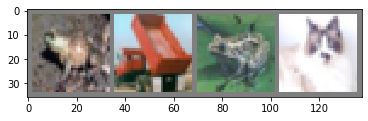

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#展示图片的函数
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show

#随机获取训练集图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

#展示图片，之前的trainloader是4个图片一个batch的
imshow(torchvision.utils.make_grid(images))
#打印图片类别标签
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [0]:
#开始卷积神经网络的实现
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
#loss func
import torch.optim as optim

criterion = nn.CrossEntropyLoss()#两者交叉熵作为损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)#权重更新

In [14]:
import time
start = time.time()
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        # 清空梯度缓存
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time()-start)

[1,  2000] loss: 2.268
[1,  4000] loss: 1.962
[1,  6000] loss: 1.688
[1,  8000] loss: 1.591
[1, 10000] loss: 1.509
[1, 12000] loss: 1.463
[2,  2000] loss: 1.382
[2,  4000] loss: 1.381
[2,  6000] loss: 1.353
[2,  8000] loss: 1.339
[2, 10000] loss: 1.297
[2, 12000] loss: 1.294
Finished Training! Total cost time:  112.64330649375916


GroundTruth:    cat  ship  ship plane


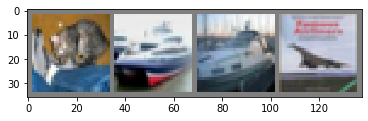

In [15]:
#测试模型效果
dataiter = iter(testloader)
images, labels = dataiter.next()

# 打印图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
outputs = net(images)
print('outputs: ', outputs)
# 预测结果
print('predict: ', torch.max(outputs, 1))#每一行最大的一个max的，能返回其索引值！！
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

outputs:  tensor([[-1.1723e+00, -2.0943e+00,  7.7904e-01,  2.3443e+00, -8.7358e-01,
          1.8514e+00,  5.4048e-01, -9.5151e-01, -7.7623e-02, -1.2553e+00],
        [ 6.2178e+00,  6.1346e+00, -2.9446e+00, -4.4344e+00, -3.7237e+00,
         -5.5322e+00, -4.9320e+00, -4.2174e+00,  7.1446e+00,  5.1061e+00],
        [ 3.8988e+00,  3.8892e+00, -1.4570e+00, -3.0158e+00, -1.5955e+00,
         -4.0524e+00, -2.7604e+00, -2.8489e+00,  4.8477e+00,  2.8336e+00],
        [ 4.7292e+00,  7.0574e-01,  1.6525e-01, -2.0937e+00,  1.0325e+00,
         -3.5557e+00, -2.1200e+00, -2.7580e+00,  3.0179e+00,  4.2230e-03]],
       grad_fn=<AddmmBackward>)
predict:  torch.return_types.max(
values=tensor([2.3443, 7.1446, 4.8477, 4.7292], grad_fn=<MaxBackward0>),
indices=tensor([3, 8, 8, 0]))
Predicted:    cat  ship  ship plane


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 62 %
Accuracy of  bird : 56 %
Accuracy of   cat : 27 %
Accuracy of  deer : 26 %
Accuracy of   dog : 64 %
Accuracy of  frog : 54 %
Accuracy of horse : 54 %
Accuracy of  ship : 74 %
Accuracy of truck : 60 %


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [20]:
import time
# 在 GPU 上训练注意需要将网络和数据放到 GPU 上
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

start = time.time()
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 清空梯度缓存
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time() - start)

[1,  2000] loss: 1.231
[1,  4000] loss: 1.221
[1,  6000] loss: 1.210
[1,  8000] loss: 1.202
[1, 10000] loss: 1.190
[1, 12000] loss: 1.195
[2,  2000] loss: 1.108
[2,  4000] loss: 1.116
[2,  6000] loss: 1.115
[2,  8000] loss: 1.129
[2, 10000] loss: 1.128
[2, 12000] loss: 1.114
Finished Training! Total cost time:  101.77197909355164
